## Gradient descent: Linear Regression

In [37]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt  

### Gradient descent with one independent variable
Model Representation: 
$$y_i = \theta_0 + \theta_1 x_i$$
Cost Function:
$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$$
Gradient Descent
$$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x_i) - y_i)$$
$$\theta_1 := \theta_1 - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x_i) - y_i)x$$

In [43]:
import time
"""
Function
--------
bivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def bivariate_ols(xvalues, yvalues, R=0.0001, MaxIterations=100000):
    t0 = time.time()
    m = xvalues.shape[0] # rows of xvalues
    # hypothesis: y = alpha + beta * x
    alpha = 0 # initial alpha
    beta = 0 # inital beta
    error = np.mean((alpha + beta*xvalues - yvalues)**2) /2 # scalar
    for i in range(MaxIterations):
        alpha_gradient = np.mean(alpha + beta*xvalues - yvalues)
        beta_gradient = np.mean((alpha + beta*xvalues - yvalues)*xvalues) 
        alpha = alpha - R * alpha_gradient # update alpha
        beta = beta- R* beta_gradient # update beta
        new_error = np.mean((alpha + beta*xvalues - yvalues)**2)/2
        if abs(error - new_error) <= 0.0000001: # converge conditions
            print("converged, iterations: %d"%(i))
            break
        else:
            error = new_error
    print("Time taken: %.2f seconds" %(time.time() - t0))
    return alpha, beta

Time taken: 4.38 seconds
alpha = -24.084398, beta = 7.437901
converged, iterations: 40832
Time taken: 1.98 seconds
alpha = -34.410855, beta = 9.061272
Time taken: 4.25 seconds
alpha = nan, beta = nan


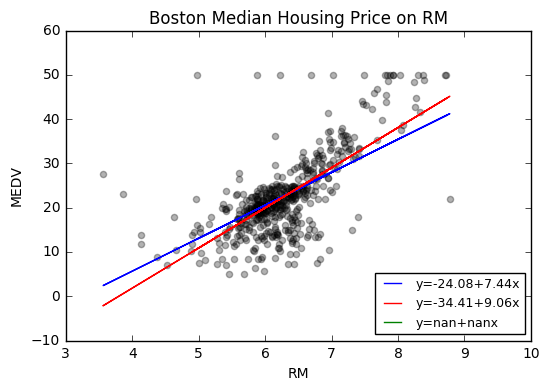

In [44]:
from sklearn.datasets import load_boston
X = bdata.data[:,5:6] # RM
Y = bdata.target.reshape(len(bdata.target),1) # reshape Y to n by 1 array
R = [0.001, 0.01, 0.05]
col = ["blue", "red", "green"]
fig = plt.figure()
plt.scatter(X,Y, color="black", alpha=0.3)
for i in range(3):
    alpha, beta = bivariate_ols(X, Y, R[i])
    print("alpha = %f, beta = %f"%(alpha, beta))
    plt.plot(X,alpha+beta*X, color=col[i], label="y=%.2f+%.2fx"%(alpha,beta))
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Boston Median Housing Price on RM")
plt.legend(loc="lower right", prop={"size":9})
plt.show()

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)
print("alpha = %f, beta = %f"%(lr.intercept_, lr.coef_))

alpha = -34.670621, beta = 9.102109


### Gradient descent with multiple variables
Model Representation: 
$$h_\theta(x) = \begin{bmatrix}\theta_0 & \theta_1 &\cdots &\theta_n \end{bmatrix}\begin{bmatrix}x_0\\x_1\\ \vdots\\x_n\end{bmatrix} = \theta^Tx$$
* We assume $x_0^{(i)}=1$ for $i\in(1,2,...,m)$

Gradient Descent:
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
* $\alpha$ is the learning rate

In [7]:
"""
Function
--------
multivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""
def multivariate_ols(xvalue_matrix, yvalues, R=0.0001, MaxIterations=100000):
    m = xvalue_matrix.shape[0] # row of matrix
    alpha = 0.0 # inital alpha
    beta_array = np.zeros([xvalue_matrix.shape[1],1],dtype=np.float) # inital beta
    pred = np.dot(xvalue_matrix, beta_array) + np.full(fill_value=alpha, shape=[m,1])
    error = np.mean((pred-yvalues)**2)/2
    
    for i in range(1,MaxIterations):
        alpha_gradient = np.mean(pred-yvalues)
        beta_gradient = np.dot(np.transpose(pred-yvalues), xvalue_matrix)/m # shape is m*1
        alpha = alpha - R * alpha_gradient
        beta_array = beta_array - R * np.transpose(R * beta_gradient)
        pred = np.dot(xvalue_matrix, beta_array) + np.full(fill_value=alpha, shape=[m,1])
        new_error = np.mean((pred-yvalues)**2)/2
        if abs(error-new_error) <= 0.0001:
            print("Converged, iterations:%d"%(i))
            break
        else:
            error = new_error
    return alpha, beta_array

In [8]:
def standardize(raw_data):
    return (raw_data - np.mean(raw_data, axis=0))/np.std(raw_data, axis=0)


In [9]:
X = bdata.data[:,[0,5]] # RM and CRIM
Y = bdata.target.reshape(len(bdata.target),1)
R = [0.001,0.01, 0.1]
for r in R:
    print("R:", r)
    alpha, beta = multivariate_ols(standardize(X), Y, r) # use standardized features
    print("alpha={0}, beta={1}\n".format(alpha, beta.flatten()))

R: 0.001
Converged, iterations:4641
alpha=22.315913022071804, beta=[-0.01639927  0.02957419]

R: 0.01
Converged, iterations:17285
alpha=22.532806324110496, beta=[-2.22772498  4.92686618]

R: 0.1
Converged, iterations:403
alpha=22.532806324110656, beta=[-2.29732111  5.78782741]



In [10]:
m_lr = LinearRegression()
m_lr.fit(standardize(X), Y)
print("alpha = {0}, beta = {1}".format(m_lr.intercept_, m_lr.coef_))

alpha = [ 22.53280632], beta = [[-2.24860926  5.89441657]]


### Normal Equation for Multivariate Linear Regression
$$\theta = (X^TX)^{-1}X^Ty$$

In [11]:
import numpy.linalg as la
X = bdata.data[:, [0,5]]
X = standardize(X)
X = np.insert(X,0,1,axis=1)
Y = bdata.target.reshape(len(bdata.target),1)
tran_X = np.transpose(X)
theta = np.dot(np.dot(la.inv(np.dot(tran_X, X)),tran_X),Y)
theta

array([[ 22.53280632],
       [ -2.24860926],
       [  5.89441657]])

### Gradient Descent for Logistic Regression 
Model Representation:
$$h_\theta(x) = g(\theta^Tx)$$
$$g(z) = \frac{1}{1+e^{-z}}$$
* $h_\theta(x)$ will give us the probability that the output is 1

Cost Function:
$$-\frac{1}{m}\sum\limits_{i=1}^m[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$

In [12]:
# Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000
EXPENSIVE = np.where(bdata.target > 40, 1.0, 0.0)

In [13]:
"""
Function
--------
multivariate_lgs
    Gradient Descent to minimize cost function of logistic regression. 
    Used to find co-efficients of multivariate logistic regression.

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def multivariate_lgs(xvalue_matrix, yvalues, R= 0.1, MaxIterations = 100000):
    start_time = time.time()
    m = xvalue_matrix.shape[0]
    alpha = 0.0 # initial alpha
    beta_array = np.zeros((xvalue_matrix.shape[1],1)) # initial beta
    yhat = np.full((m,1),alpha) + np.dot(xvalue_matrix, beta_array) # yhat = alpha + beta*x
    pred = 1.0/(1.0 + np.exp(-yhat)) # prediction based on logistic distribution
    error = -1/m*(np.dot(np.transpose(yvalues), np.log(pred))+np.dot(np.transpose(1-yvalues), np.log(1-pred))) # loss function
    for i in range(MaxIterations):
        alpha_gradient = np.mean(pred-yvalues) # alpha gradient
        beta_gradient = np.dot(np.transpose(pred-yvalues), xvalue_matrix)/m # beta gradient, same as linear regression
        alpha = alpha - R*alpha_gradient # update alpha, scalar
        beta_array = beta_array - np.transpose(R*beta_gradient) # update beta array, shape = (n,1)
        yhat = np.full((m,1),alpha) + np.dot(xvalue_matrix, beta_array) 
        pred = 1.0/(1.0 + np.exp(-yhat))
        new_error = -1/m*(np.dot(np.transpose(yvalues), np.log(pred))+np.dot(np.transpose(1-yvalues), np.log(1-pred)))
        if abs(error-new_error)<1e-10:
            print("Converged, iterations:%d"%i)
            break
        else:
            error = new_error
    #print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return alpha, beta_array

In [14]:
X = bdata.data[:,[3,5]] # CHAS AND RM
Y = EXPENSIVE.reshape(len(EXPENSIVE),1) # reshape EXPENSIVE to n by 1 array
alpha, beta = multivariate_lgs(standardize(X),Y) # logistic regression fit
print("alpha={0}, beta={1}\n".format(alpha, beta.flatten()))

Converged, iterations:8038
Time taken: 0.56 seconds
alpha=-4.576521961711682, beta=[ 0.33369054  2.16050336]



In [15]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(C=1e10)
lgr.fit(standardize(X), Y.flatten())
print(lgr.intercept_, lgr.coef_)

[-4.58037959] [[ 0.33396565  2.1627009 ]]


### Regularized Linear Regression

Cost Function:
$$\frac{1}{2m} \sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})^2 + {\lambda}\sum\limits_{j=1}^n{{\theta}_j^2}$$

* The $\lambda$ is the regularization parameter. It determines how much the costs of our $\theta$ parameters are inflated

Gradient Descent:
$$\theta_0 := \theta_0 - \frac{\alpha}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_0^{(i)}$$
$$\theta_j := \theta_j(1-\alpha{\frac{\lambda}{m}}) - \frac{\alpha}{m}\sum\limits_{i=1}^m (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)} $$

* $1−\alpha\frac{\lambda}{m}$ will always be less than 1. Intuitively it reduces the value of $\theta$ by some amount on every update. 

In [32]:
"""
Function 
----------
multivariate_ols_ridge
     Gradient Descent algorithm that includes a ridge regularizationto penalize excessive complexity.

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
_lambda: float
    Penalty term
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def multivariate_ols_ridge(xvalue_matrix, yvalues, _lambda = 100, R=0.01,  MaxIterations=100000):
    #start_time = time.time()
    m = xvalue_matrix.shape[0]
    alpha = 0.0
    beta_array = np.zeros((xvalue_matrix.shape[1],1)) 
    pred = np.full((m,1),alpha) + np.dot(xvalue_matrix, beta_array) # prediction
    #error = np.sum((pred - yvalues)**2)/m # error
    error = np.mean((pred-yvalues)**2)/2
    for i in range(MaxIterations):
        alpha_gradient = np.sum(pred-yvalues)/m
        beta_gradient = np.dot(np.transpose(pred-yvalues), xvalue_matrix)/m
        alpha = alpha - R*alpha_gradient # update alpha in the same way 
        beta_array = beta_array*(1-_lambda*R/m) - np.transpose(R*beta_gradient) # update beta with penalty term
        pred = np.full((m,1),alpha) + np.dot(xvalue_matrix, beta_array) 
        new_error = np.mean((pred-yvalues)**2)/2
        if abs(new_error - error)<0.0001:
            #print('Converged, iterations:{0}'.format(i))
            break
        else:
            error = new_error
    #print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return(alpha, beta_array)

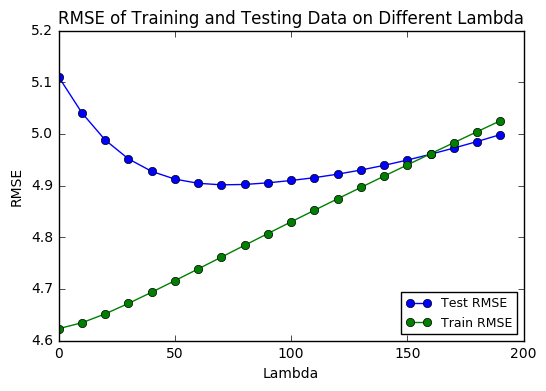

In [33]:
from sklearn.cross_validation import KFold
X = bdata.data[:,:13]# use all features in the original dataset
Y = bdata.target.reshape(len(bdata.target),1)
kf = KFold(n=len(bdata.target),n_folds=10) # k-fold cross-validation k = 10
lambda_ls = np.arange(0, 200, 10) # choose different lambda values
cv_train_rmse = []
cv_test_rmse = []
cv_alpha = []
cv_beta = []
for i in range(len(lambda_ls)):
    test_rmse = []
    train_rmse = []
    for train_index, test_index in kf:
        train_X,test_X = standardize(X)[train_index],standardize(X)[test_index] # standardize features
        train_Y,test_Y = Y[train_index],Y[test_index]
        kf_alpha, kf_beta = multivariate_ols_ridge(train_X,train_Y, lambda_ls[i]) # fit multivariate regression 
        pred_train = np.full((train_X.shape[0],1),kf_alpha) + np.dot(train_X, kf_beta) # prediction of training data
        train_rmse.append(np.sqrt(np.mean((train_Y-pred_train)**2)))# train rmse
        pred_test = np.full((test_X.shape[0],1),kf_alpha) + np.dot(test_X, kf_beta) # prediction of testing data
        test_rmse.append(np.sqrt(np.mean((test_Y-pred_test)**2))) # test rmse
    cv_train_rmse.append(np.mean(train_rmse))
    cv_test_rmse.append(np.mean(test_rmse))

# plot lambda vs RMSE
plt.plot(lambda_ls, cv_test_rmse, linestyle='-', marker='o', label="Test RMSE")
plt.plot(lambda_ls, cv_train_rmse,linestyle='-', marker='o', label="Train RMSE")
plt.legend(loc="lower right", prop={"size":9})
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("RMSE of Training and Testing Data on Different Lambda")
plt.show()